# データサイエンス第10回
## 回帰分析

In [ ]:
# 必要に応じて次の行のコメントアウトを解除し，ライブラリをインストールしてください
!pip install geopandas matplotlib numpy pandas pyserial requests japanize-matplotlib scikit-learn setuptools 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import japanize_matplotlib 

<span style="font-size: 20px; color: #F08000;">例題1-1</span>

以下の表は気温とアイスコーヒーの売上に関するデータである

回帰直線を求め、散布図と併せて表示せよ

|    | 気温 (℃) | 売上（杯） |
|------|---------|----------|
| 1  | 28       | 243        |
| 2  | 22       | 191        |
| 3  | 18       | 182        |
| 4  | 8        | 123        |
| 5  | 32       | 281        |
| 6  | 24       | 190        |
| 7  | 22       | 218        |
| 8  | 16       | 182        |
| 9  | 12       | 151        |
| 10 | 4        | 132        |
| 11 | 11       | 141        |
| 12 | 20       | 191        |

### 回帰係数の算出

18.5 183.66666666666666
84.31752305665349 5.370223978919631


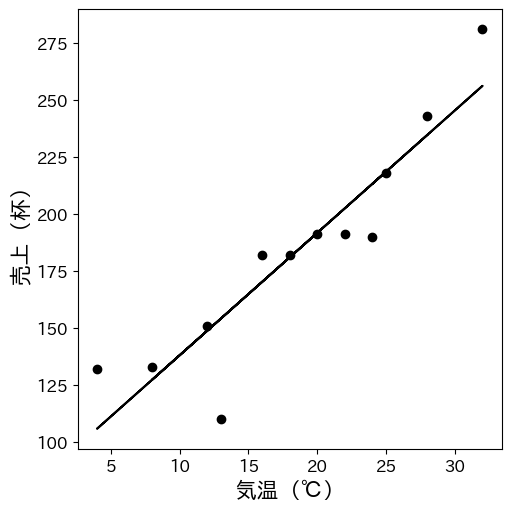

In [3]:
data = {
    "気温": np.array([ 28,  22,  18,   8,  32,  24,  25,  16,  12,   4,  13,  20]),
    "売上": np.array([243, 191, 182, 133, 281, 190, 218, 182, 151, 132, 110, 191])
}

x = data["気温"]
y = data["売上"]

x_m = np.mean(x)
y_m = np.mean(y)

beta_1 = np.dot(x-x_m, y-y_m) / np.dot(x-x_m, x-x_m)
beta_0 = np.mean(y) - beta_1 * np.mean(x)

y_hat = beta_1*x + beta_0

print(x_m, y_m)
print(beta_0, beta_1)

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.scatter(x, y, color='k')
ax.plot(x, y_hat, 'k-')

ax.set_xlabel('気温（℃）', fontsize=16)
ax.set_ylabel('売上（杯）', fontsize=16)
ax.tick_params(labelsize=12)

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_82793/2006824695.py:28: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel('気温 ($^\circ$C)', fontsize=14, labelpad=12)


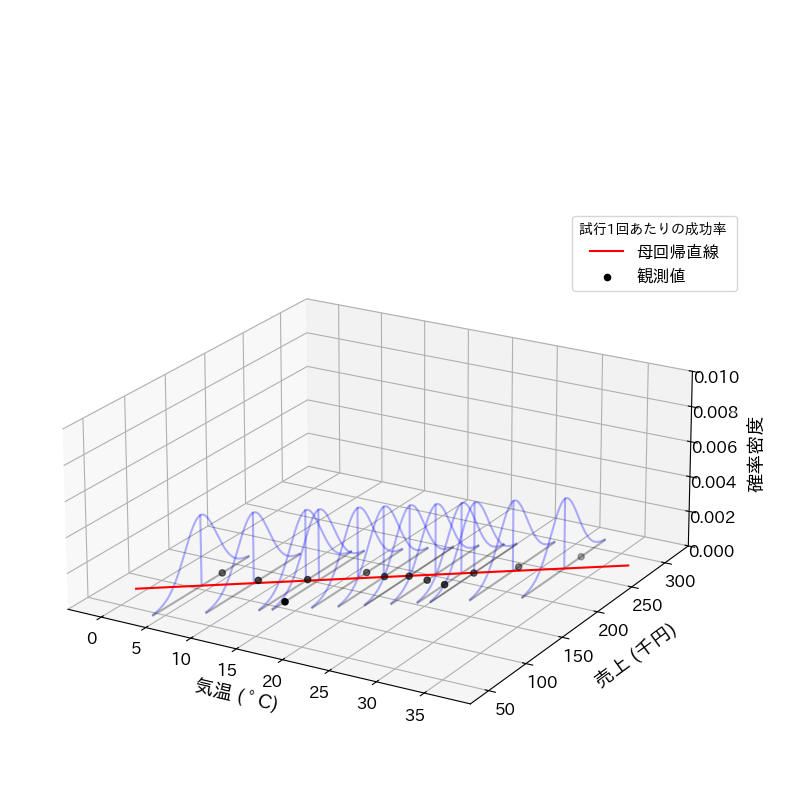

In [5]:
fig = plt.figure(figsize=(12, 8), layout='constrained')
ax = fig.add_subplot(111, projection='3d')

# x軸、y軸、z軸のデータ作成
x_values_3d = np.linspace(min(x) - 5, max(x) + 5, 100)
y_expectation_3d = beta_0 + beta_1 * x_values_3d
sigma = 20

# 各xにおける正規分布を3Dで描画
for xi, yi in zip(x, y):
    mean_y = beta_0 + beta_1 * xi  # 各xに対応する平均値
    y_distribution = np.linspace(mean_y - 3 * sigma, mean_y + 3 * sigma, 500)
    normal_curve = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((y_distribution - mean_y) / sigma)**2)
    z_values = normal_curve / 5  # スケーリングして分布曲線をz軸方向に表示
    ax.plot(xi * np.ones_like(y_distribution), y_distribution, z_values, color='blue', alpha=0.3)
    ax.plot(xi * np.ones_like(y_distribution), y_distribution, np.zeros_like(y_distribution), color='black', alpha=0.3)
    ax.plot(xi * np.asarray([1,1]), (beta_0+beta_1*xi)*np.asarray([1,1]), np.asarray([0,np.max(z_values)]), color='blue', alpha=0.3)



# 母回帰直線を3Dでプロット
ax.plot(x_values_3d, beta_0 + beta_1 * x_values_3d, np.zeros_like(x_values_3d), color='red', label='母回帰直線')

# 各データ点をプロット
ax.scatter(x, y, np.zeros_like(x), color='black', label='観測値', zorder=5)

# ラベル設定
ax.set_xlabel('気温 ($^\circ$C)', fontsize=14, labelpad=12)
ax.set_ylabel('売上 (千円)', fontsize=14, labelpad=16)
ax.set_zlabel('確率密度', fontsize=14, labelpad=12)
ax.tick_params(labelsize=12)
ax.zaxis.label.set_rotation(90)
ax.legend(fontsize=12,title="試行1回あたりの成功率 ", bbox_to_anchor=(0.7, 0.75), loc='upper left')
ax.set_zlim(0, 0.01)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.9, 0.9, 0.5, 1]))
ax.view_init(elev=20, azim=-60)

### 残差平方和 $SS_{residual}$ 

$$
SS_{residual} = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

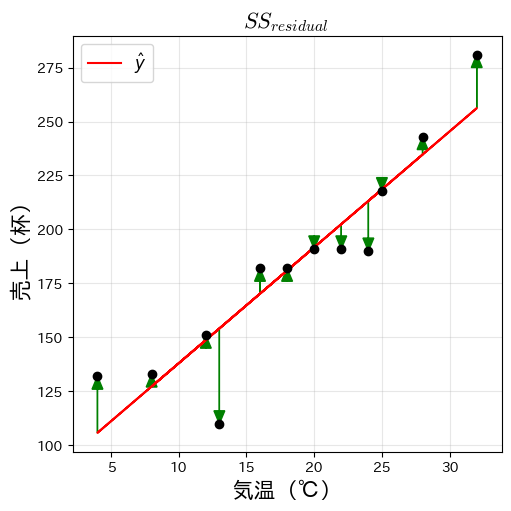

In [6]:
coefficients = np.polyfit(x, y, 1)
y_hat = np.polyval(coefficients, x)

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.scatter(x, y, color='black', zorder=5)
ax.plot(x, y_hat, color='red', label=r'$\hat{y}$', zorder=4)

for xi, yi, y_hat_i in zip(x, y, y_hat):
   ax.arrow(xi, y_hat_i, 0, yi - y_hat_i, head_width=0.8, head_length=6, color='green', length_includes_head=True, zorder=3)

ax.set_xlabel('気温（℃）', fontsize=16)
ax.set_ylabel('売上（杯）', fontsize=16)
ax.set_title(r'$SS_{residual}$ ', math_fontfamily='cm', fontsize=16)
ax.legend(fontsize=12)
plt.grid(alpha=0.3)

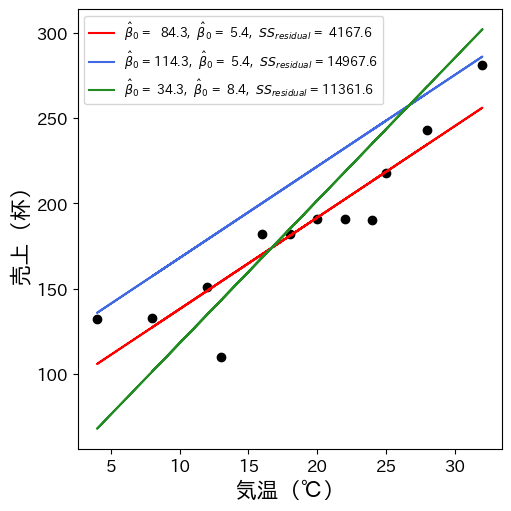

In [7]:
data = {
    "気温": np.array([ 28,  22,  18,   8,  32,  24,  25,  16,  12,   4,  13,  20]),
    "売上": np.array([243, 191, 182, 133, 281, 190, 218, 182, 151, 132, 110, 191])
}

x = data["気温"]
y = data["売上"]

x_m = np.mean(x)
y_m = np.mean(y)

beta_a1 = np.dot(x-x_m, y-y_m) / np.dot(x-x_m, x-x_m)
beta_a0 = np.mean(y) - beta_1 * np.mean(x)
beta_b1 = beta_a1 
beta_b0 = beta_a0 + 30
beta_c1 = beta_a1 + 3
beta_c0 = beta_a0 - 50
y_hata = beta_a1*x + beta_a0
y_hatb = beta_b1*x + beta_b0
y_hatc = beta_c1*x + beta_c0

ssea = np.sum((y-(beta_a0+beta_a1*x))**2)
sseb = np.sum((y-(beta_b0+beta_b1*x))**2)
ssec = np.sum((y-(beta_c0+beta_c1*x))**2)

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.scatter(x, y, color='k')
ax.plot(x, y_hata, 'r-', label=r'$\hat{\beta}_0$'+f' = {beta_a0:6.1f},  ' + r'$\hat{\beta}_0$'+f' = {beta_a1:4.1f},  ' + r'$SS_{residual}$'+f' = {ssea:7.1f}')

ax.plot(x, y_hatb, '-', c='royalblue', label=r'$\hat{\beta}_0$'+f' = {beta_b0:5.1f},  ' + r'$\hat{\beta}_0$'+f' = {beta_b1:4.1f},  ' + r'$SS_{residual}$'+f' = {sseb:7.1f}')

ax.plot(x, y_hatc, '-', c='forestgreen', label=r'$\hat{\beta}_0$'+f' = {beta_c0:5.1f},  ' + r'$\hat{\beta}_0$'+f' = {beta_c1:4.1f},  ' + r'$SS_{residual}$'+f' = {ssec:7.1f}')

ax.set_xlabel('気温（℃）', fontsize=16)
ax.set_ylabel('売上（杯）', fontsize=16)
ax.tick_params(labelsize=12)
ax.legend(fontsize=9)

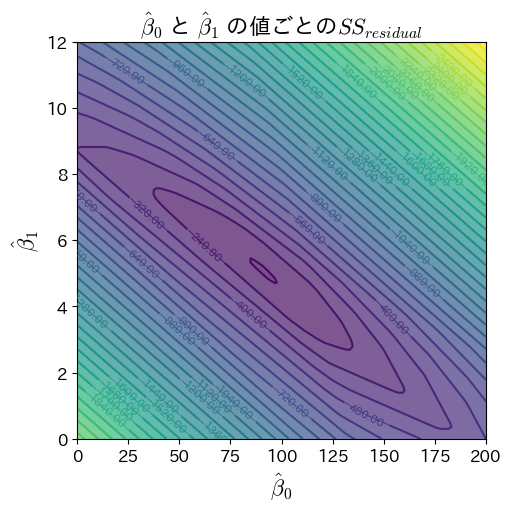

In [8]:
B0 = np.linspace(0, 200, 100)
B1 = np.linspace(0, 12, 100)

X, Y = np.meshgrid(B0, B1)
Z = np.zeros([100, 100])
for i, b0 in enumerate(B0):
    for j, b1 in enumerate(B1):
        for x, y in zip(data["気温"], data["売上"]):
            Z[j,i] += np.sqrt((y - (b0+b1*x))**2)

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
contour = ax.contour(X, Y, Z, levels=40, cmap='viridis', alpha=1.0)

ax.contourf(X, Y, Z, levels=40, cmap='viridis', alpha=0.7)
ax.clabel(contour, inline=True, fontsize=8, fmt="%.2f")

ax.set_title(r'$\hat{\beta}_{0}$ と $\hat{\beta}_{1}$ の値ごとの$SS_{residual}$', math_fontfamily='cm', fontsize=16)
ax.set_xlabel(r'$\hat{\beta}_{0}$', math_fontfamily='cm', fontsize=16)
ax.set_ylabel(r'$\hat{\beta}_{1}$', math_fontfamily='cm', fontsize=16)
ax.tick_params(labelsize=12)

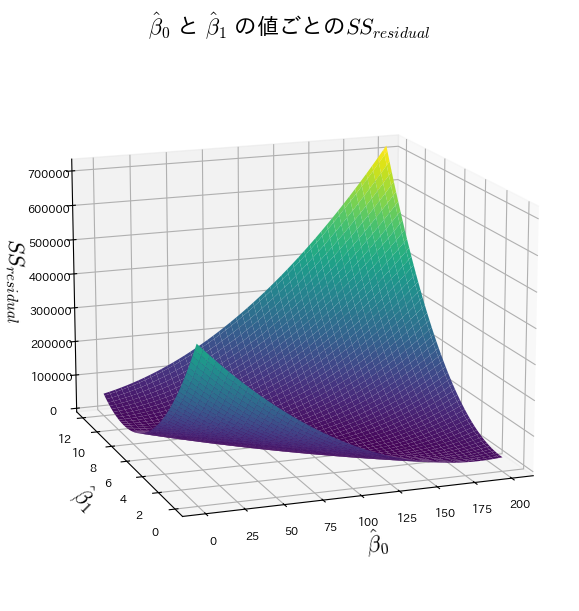

In [9]:
B0 = np.linspace(0, 200, 100)
B1 = np.linspace(0, 12, 100)
Z = np.zeros([100, 100])
X, Y = np.meshgrid(B0, B1)

for i, b0 in enumerate(B0):
    for j, b1 in enumerate(B1):
        for x, y in zip(data["気温"], data["売上"]):
            Z[j,i] += (y - (b0+b1*x))**2

fig = plt.figure(figsize=(8, 6), layout='constrained')
ax = fig.add_subplot(111, projection='3d')  # 3D プロット設定
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.view_init(elev=15, azim=-110)
ax.set_title(r'$\hat{\beta}_{0}$ と $\hat{\beta}_{1}$ の値ごとの$SS_{residual}$', math_fontfamily='cm', fontsize=16)
ax.set_xlabel(r'$\hat{\beta}_{0}$', math_fontfamily='cm', fontsize=16)
ax.set_ylabel(r'$\hat{\beta}_{1}$', math_fontfamily='cm', fontsize=16)
ax.set_zlabel(r'$SS_{residual}$', math_fontfamily='cm', fontsize=16, labelpad=8)
ax.tick_params(labelsize=8)

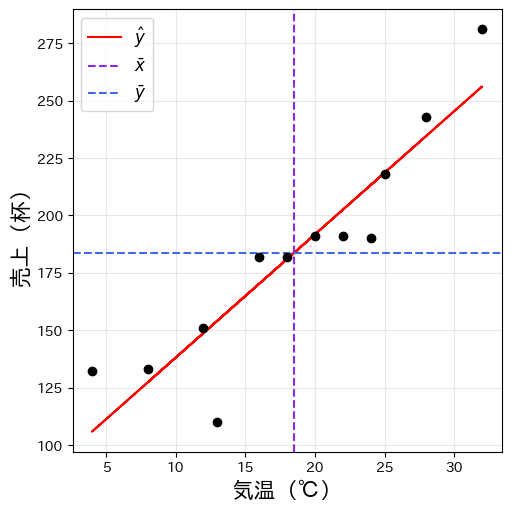

In [10]:
x = data["気温"]
y = data["売上"]
coefficients = np.polyfit(x, y, 1)
y_hat = np.polyval(coefficients, x)
y_bar = np.mean(y)*np.ones_like(x)

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.scatter(x, y, color='black', zorder=5)
ax.plot(x, y_hat, color='red', label=r'$\hat{y}$')

ax.axvline(x=np.mean(x), color='blueviolet', linestyle='--', label=r'$\bar{x}$')
ax.axhline(y=np.mean(y), color='royalblue', linestyle='--', label=r'$\bar{y}$')

ax.set_xlabel('気温（℃）', fontsize=16)
ax.set_ylabel('売上（杯）', fontsize=16)
ax.legend(fontsize=12)
plt.grid(alpha=0.3)

### 決定係数

### 回帰平方和 $SS_{regression}$ 

$$
SS_{regression} = \sum_{i=1}^n \left(\hat{y}_i - \bar{y}\right)^2
$$

偏差の起点は，$y$ の標本平均 $\bar{y}$ である
偏差の終点は回帰直線である


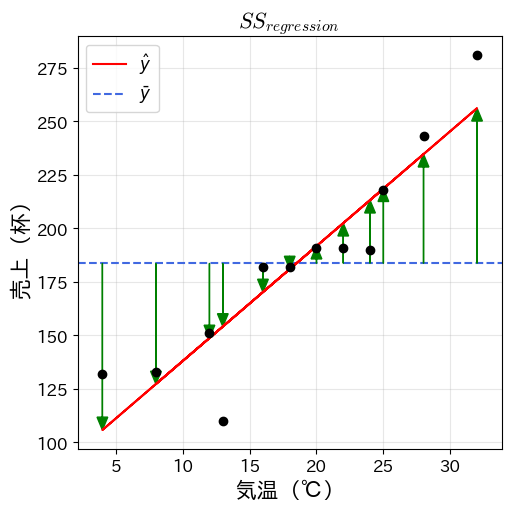

In [11]:
x = data["気温"]
y = data["売上"]
coefficients = np.polyfit(x, y, 1)
y_bar = np.mean(y)*np.ones_like(x)
y_hat = np.polyval(coefficients, x)

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.scatter(x, y, color='black', zorder=5)
ax.plot(x, y_hat, color='red', label=r'$\hat{y}$', zorder=4)
ax.axhline(y=np.mean(y), color='royalblue', linestyle='--', label=r'$\bar{y}$')

for xi, yi, y_bar_i, y_hat_i in zip(x, y, y_bar, y_hat):
   ax.arrow(xi, y_bar_i, 0, y_hat_i - y_bar_i, head_width=0.8, head_length=6, color='green', length_includes_head=True, zorder=3)

ax.set_xlabel('気温（℃）', fontsize=16)
ax.set_ylabel('売上（杯）', fontsize=16)
ax.set_title(r'$SS_{regression}$ ', math_fontfamily='cm', fontsize=16)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.grid(alpha=0.3)


### $SS_{total}$ 

単純に $y$ の散らばりを計算する
$$
SS_{total} = \sum_{i=1}^n \left(y_i - \bar{y} \right)^2
$$

- 偏差の起点は $y$ の標本平均 $\bar{y}$ である
- 残差の終点は点 $(x_i, y_i)$ であり，矢印は鉛直方向に引く

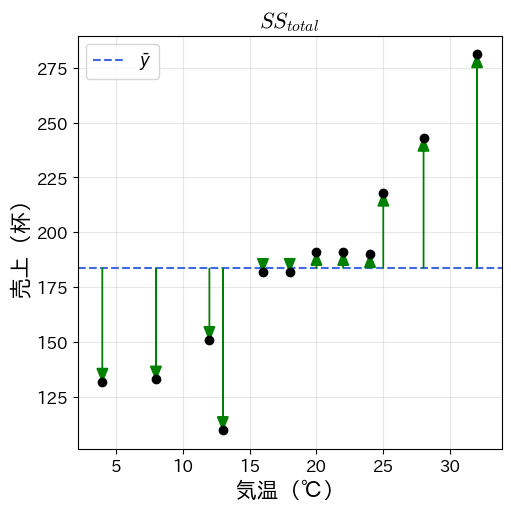

In [12]:
x = data["気温"]
y = data["売上"]

coefficients = np.polyfit(x, y, 1)
y_bar = np.mean(y)*np.ones_like(x)
y_hat = np.polyval(coefficients, x)

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.scatter(x, y, color='black', zorder=5)
ax.axhline(y=np.mean(y), color='royalblue', linestyle='--', label=r'$\bar{y}$')

for xi, yi, y_bar_i in zip(x, y, y_bar):
   ax.arrow(xi, y_bar_i, 0, yi - y_bar_i, head_width=0.8, head_length=6, color='green', length_includes_head=True, zorder=3)

ax.set_xlabel('気温（℃）', fontsize=16)
ax.set_ylabel('売上（杯）', fontsize=16)
ax.set_title(r'$SS_{total}$ ', math_fontfamily='cm', fontsize=16)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.grid(alpha=0.3)

### 決定係数
決定係数
$$
r^2 = 1-\frac{SS_{residual}}{SS_{total}} = \frac{SS_{regression}}{SS_{total}}
$$

相関係数 $r$ を2乗すると，これが本節で紹介した決定係数と一致する
$$
r^2 = 1 - \frac{SS_{residual}}{SS_{total}} = \frac{SS_{regression}}{SS_{total}}
$$

In [13]:
sst = np.sum((y - np.mean(y))**2)
sse = np.sum((y-(beta_0+beta_1*x))**2)
ssr = np.sum((beta_0+beta_1*x - np.mean(y))**2)

print(f"1-sse/sst: {1-sse/sst:.3f}")
print(f"ssr/sst: {ssr/sst:.3f}")
print(f"np.corrcoef(x, y)[0, 1]**2: {np.corrcoef(x, y)[0, 1]**2:.3f}")

1-sse/sst: 0.840
ssr/sst: 0.840
np.corrcoef(x, y)[0, 1]**2: 0.840


1-ss_regression/ss_total: 0.990


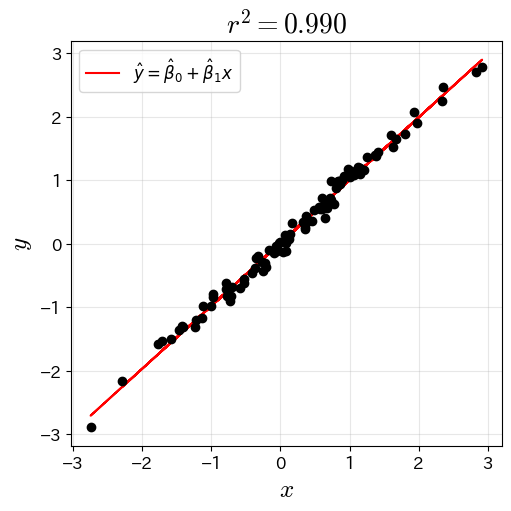

In [14]:
x = np.random.normal(0, 1, 100)
y = x + np.random.normal(0, 0.1, 100)

x_m = np.mean(x)
y_m = np.mean(y)

beta_1 = np.dot(x-x_m, y) / np.dot(x-x_m, x-x_m)
beta_0 = np.mean(y) - beta_1 * np.mean(x)

y_hat = beta_0+beta_1*x

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.scatter(x, y, color='black', zorder=5)
ax.plot(x, y_hat, color='red', label=r'$\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$', zorder=4)

sst = np.sum((y - y_m)**2)
sse = np.sum((y-(beta_0+beta_1*x))**2)

print(f"1-ss_regression/ss_total: {1-sse/sst:.3f}")

ax.set_xlabel(r'$x$', fontsize=18, math_fontfamily='cm')
ax.set_ylabel(r'$y$', fontsize=18, math_fontfamily='cm')
ax.set_title(r'$r^2={:.3f}$'.format(1-sse/sst), math_fontfamily='cm', fontsize=20)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.grid(alpha=0.3)

1-sse/sst: 0.000


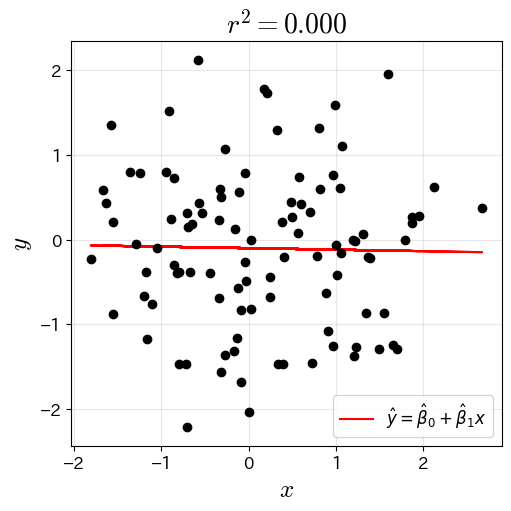

In [15]:
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

x_m = np.mean(x)
y_m = np.mean(y)

beta_1 = np.dot(x-x_m, y) / np.dot(x-x_m, x-x_m)
beta_0 = np.mean(y) - beta_1 * np.mean(x)

y_hat = beta_0+beta_1*x

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.scatter(x, y, color='black', zorder=5)
ax.plot(x, y_hat, color='red', label=r'$\hat{y}=\hat{\beta}_0+\hat{\beta}_1x$', zorder=4)

sst = np.sum((y - y_m)**2)
sse = np.sum((y-(beta_0+beta_1*x))**2)


print(f"1-sse/sst: {1-sse/sst:.3f}")

ax.set_xlabel(r'$x$', fontsize=18, math_fontfamily='cm')
ax.set_ylabel(r'$y$', fontsize=18, math_fontfamily='cm')
ax.set_title(r'$r^2={:.3f}$'.format(1-sse/sst), math_fontfamily='cm', fontsize=20)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.grid(alpha=0.3)

<span style="font-size: 20px; color: #F08000;">問題1</span>

以下のデータは学習時間とテストの点数についてまとめたものである
<style scoped>table{font-size: 16px; line-height: 1.15;}</style>


1. 学習時間を説明変数（横軸），テストの点数を目的変数（縦軸）とし，散布図を描け
2. 回帰直線を求め散布図と合わせて表示せよ
3. 決定係数を計算せよ



|      | 学習時間[h] | テストの点数 | 
| ---- | ---- | ---- | 
| #1   | 1.8   | 72   | 
| #2   | 3.2   | 81   | 
| #3   | 4.5   | 89   | 
| #4   | 3.1   | 88   | 
| #5   | 0.3   | 71   | 
| #6   | 1.3   | 73   | 
| #7   | 2.2   | 82   | 
| #8   | 0.4   | 62   | 
| #9   | 0.6   | 67   | 
| #10   | 1.7   | 69   | 

In [16]:
##############################
# 問題1のコードを記入

##############################